In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [8]:
data = pd.read_csv("/content/creditcard.csv", on_bad_lines='skip')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277837575558899,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638671952771851,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679401917229,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.00527359678253453,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.79827849458971,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
print(data.shape)
print(data.describe())

(280818, 31)
                Time             V1             V2             V3  \
count  280818.000000  280818.000000  280818.000000  280818.000000   
mean    95940.276699       0.000691      -0.003416      -0.012355   
std     46865.945626       1.961743       1.654869       1.509635   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     55463.000000      -0.921344      -0.605669      -0.904573   
50%     86089.500000       0.016135       0.064916       0.165317   
75%    139741.750000       1.321442       0.805076       1.016897   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  280818.000000  280818.000000  280818.000000  280818.000000   
mean       -0.005911       0.002979      -0.001494       0.004442   
std         1.413309       1.382034       1.333117       1.235689   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.853604

In [12]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFraction = float(len(fraud))/len(valid)
print(outlierFraction)

0.0016586469008271832


In [22]:
print("Details of valid transactions:")
valid.Amount.describe()

Details of valid transactions:


count    280349.000000
mean         88.747601
std         251.307052
min           0.000000
25%           5.540000
50%          22.250000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
print("Details of fraud transactions:")
fraud.Amount.describe()

Details of fraud transactions:


count     465.000000
mean      124.094602
std       255.945310
min         0.000000
25%         1.000000
50%        12.310000
75%       106.550000
max      2125.870000
Name: Amount, dtype: float64

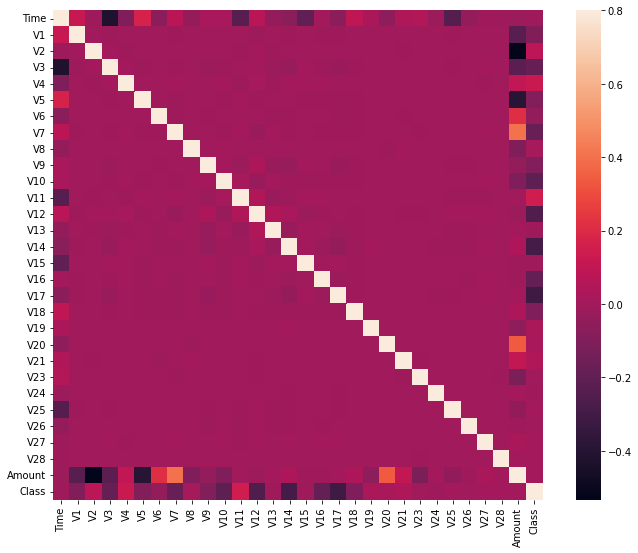

In [23]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [25]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

(280818, 30)
(280818,)


In [27]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(X.values, Y.values, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
rfc = RandomForestClassifier()
rfc.fit(trainX, trainY)

predY = rfc.predict(testX)

n_errors = (predY != testY).sum()

acc = accuracy_score(testY, predY)
print("The accuracy is {}".format(acc))
  
prec = precision_score(testY, predY)
print("The precision is {}".format(prec))

The accuracy is 0.9995611109160493
The precision is 0.9866666666666667
